Predict House Prices

data set :-kc_house_data.csv.zip

Dataset Info –

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

19 house features plus the price and the id columns, along with 21613 observations.

Column Info –

id - a notation for a house

date -Date house was sold

price- Price is prediction target

bedrooms- Number of Bedrooms/House

bathrooms- Number of bathrooms/bedrooms

sqft_living- square footage of the home

sqft_lot- square footage of the lot

floors-Total floors (levels) in house

waterfront- House which has a view to a waterfront

view-Has been viewed

condition-How good the condition is ( Overall )

grade-overall grade given to the housing unit, based on King County grading system

sqft_above-square footage of house apart from basement

sqft_basement-square footage of the basement

yr_built-Built Year

yr_renovated-Year when house was renovated

zipcode-zip

lat-Latitude coordinate

long-Longitude coordinate

sqft_living15-Living room area in 2015(implies-- some renovations) This might or might not have affected the 

lotsize area-sqft_lot15

lotSize area in 2015(implies-- some renovations)



Steps –

Import libraries and read the dataset.

Explore Data Analysis. Find out how one variable related to other and distributions of data.

State your insights.

Build a linear regression model to predict the house prices

Try to find out important features or create new features to improve the performance for your model.

Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

PS - You can change the order of steps or add additional steps to figure out the best solution.


### Question: Import libraries and read the dataset.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Read the data into a data frame
data = pd.read_csv('kc_house_data.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question: Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [17]:
# Check the number of data points in the data set
print(data.shape)
# Check the data types
print(data.dtypes)

(21613, 21)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [18]:
print(data.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


Since there are Python objects in the data set, we may have some categorical features. Let's check them.

In [19]:
data.select_dtypes(include=['O']).columns.tolist()

['date']

We only have the date column which is a timestamp that we can ignore, age of building already there in yr_built

In [20]:
# Check any number of columns with NaN
print(data.isnull().any().sum(), ' / ', len(data.columns))
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  21
0  /  21613


In [21]:
sample_df = data.sample(1000)
sample_df.shape

(1000, 21)

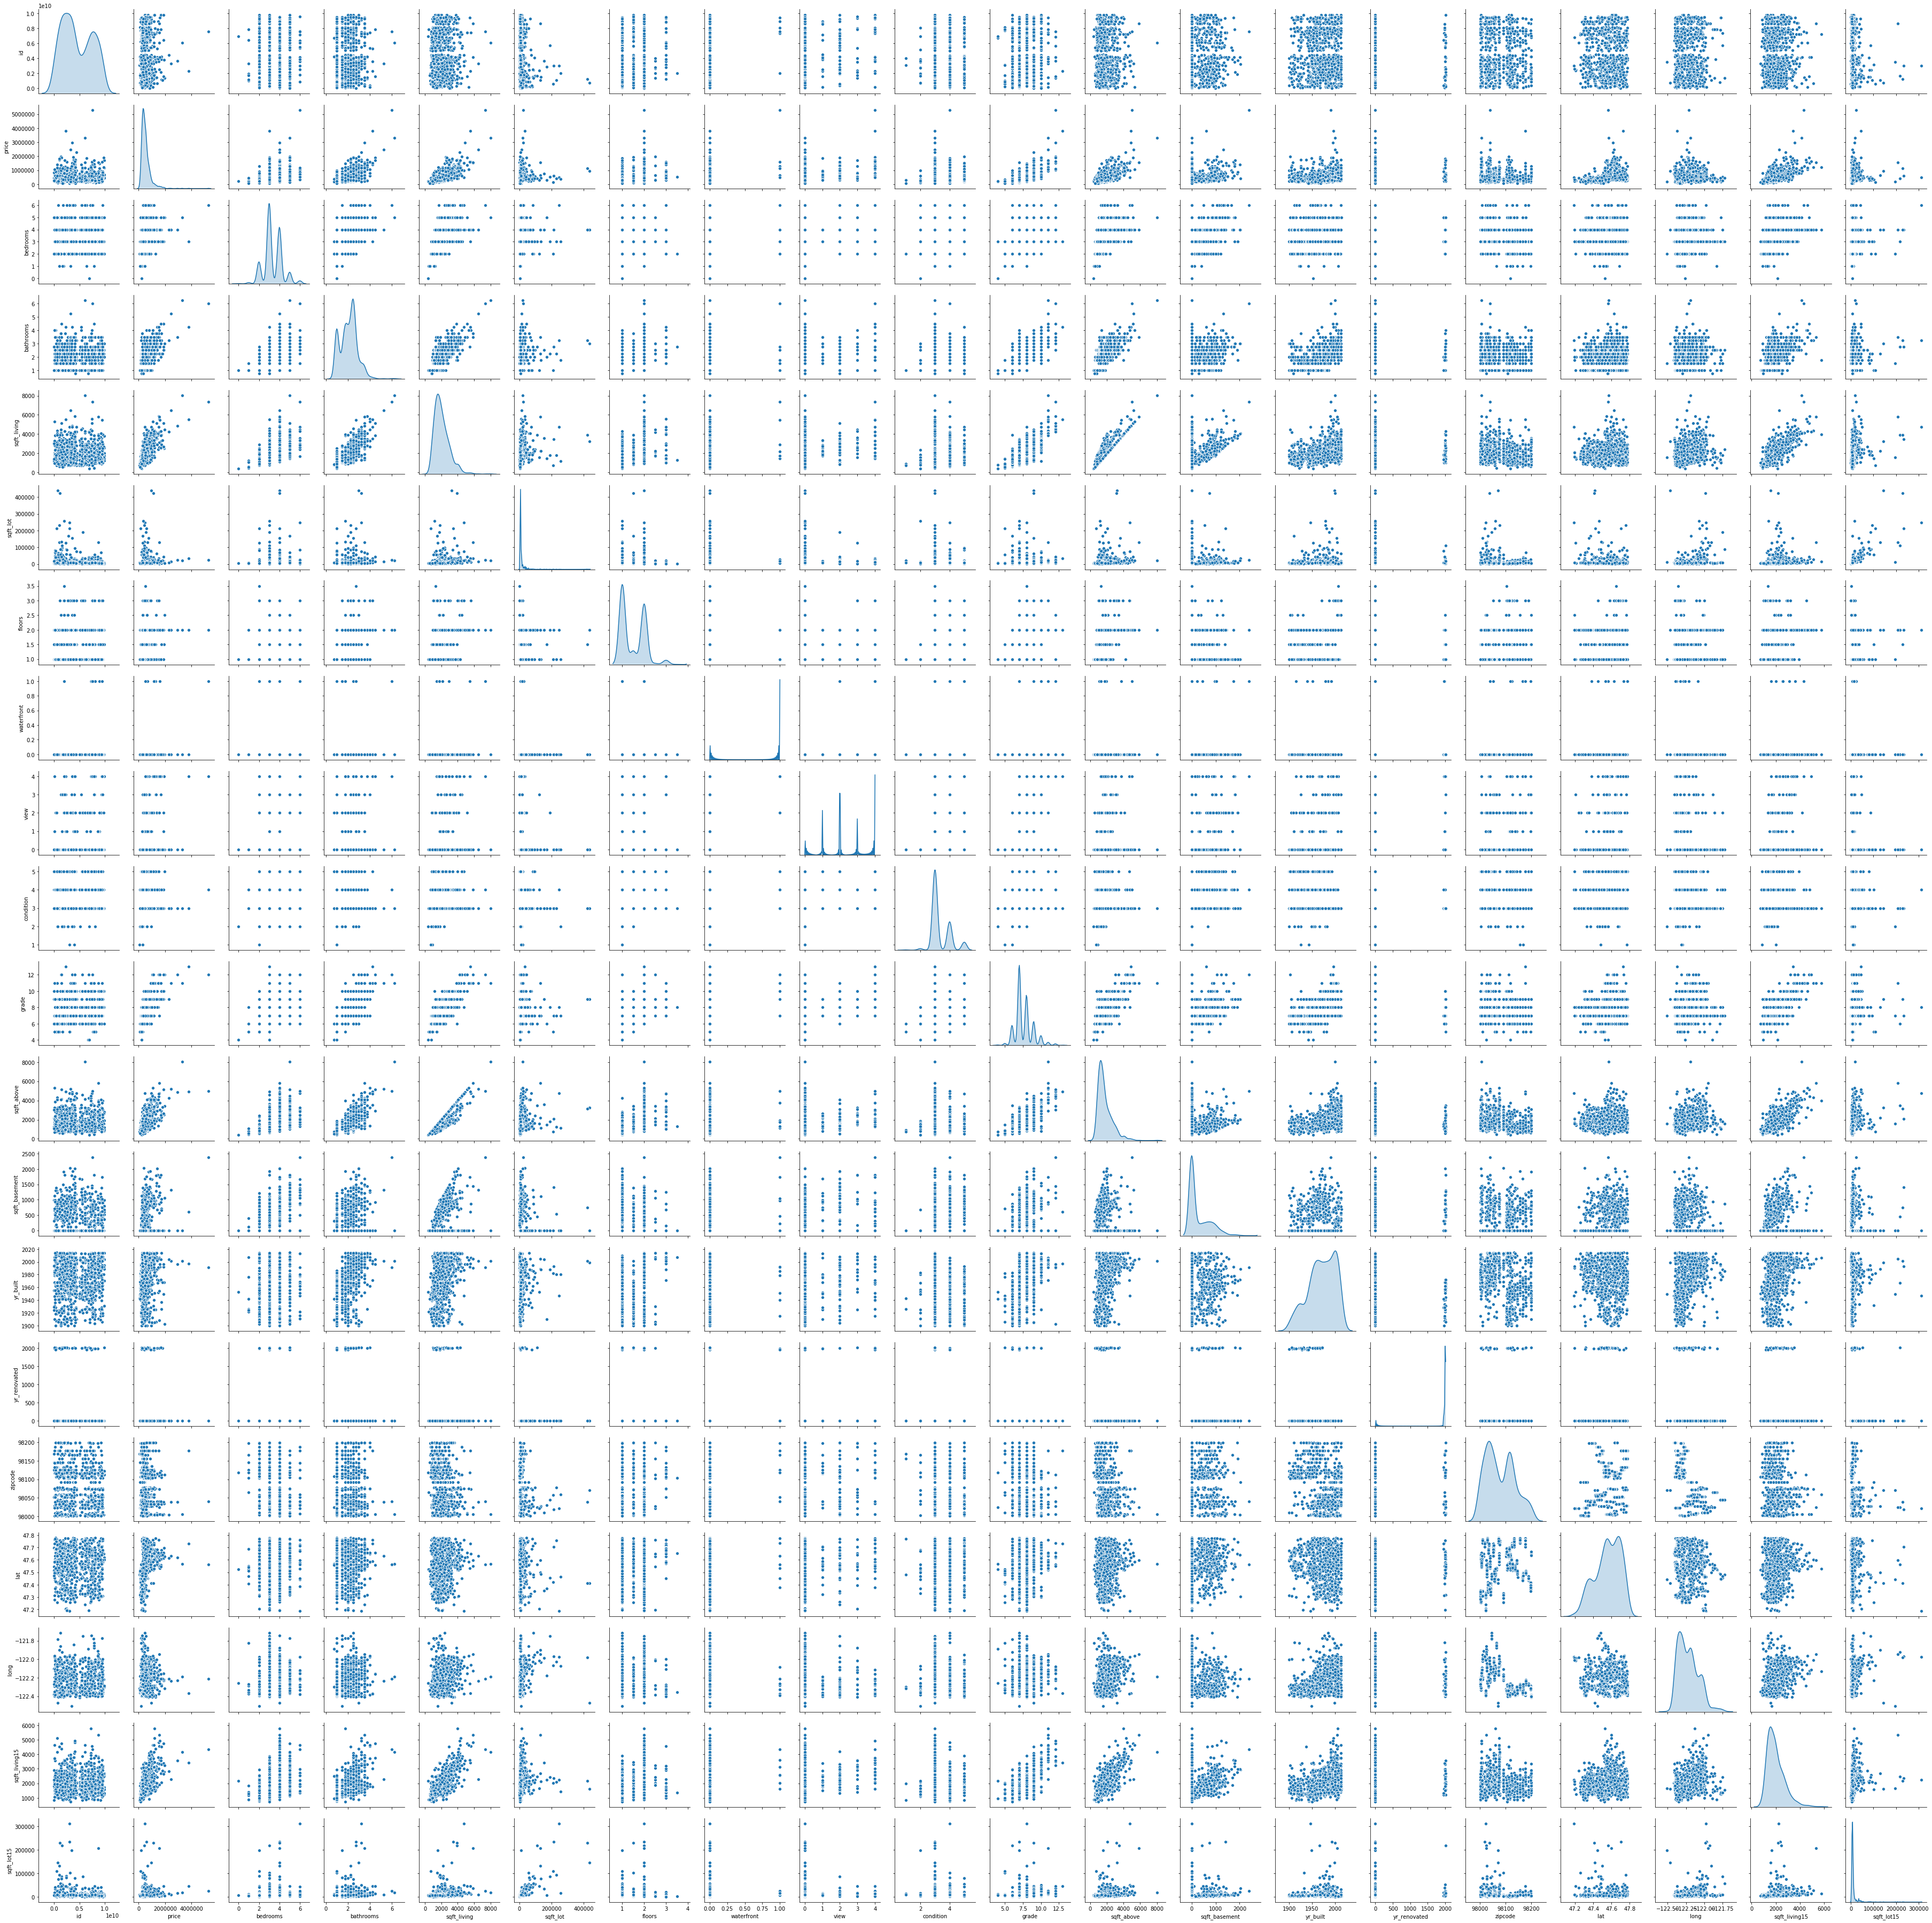

In [22]:
import seaborn as sns
sns.pairplot(sample_df, diag_kind='kde')

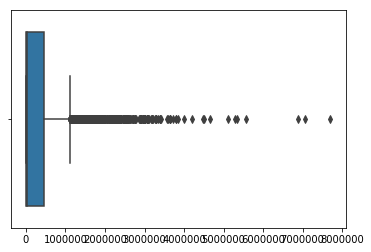

In [67]:
sns.boxplot(data[['bedrooms', 'price']])

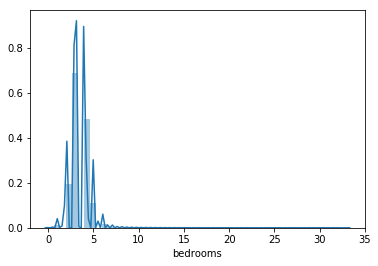

In [68]:
sns.distplot( data['bedrooms'])

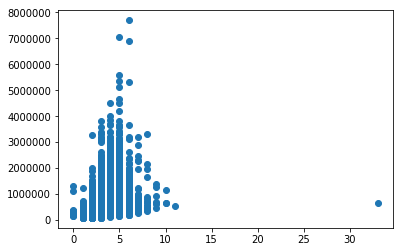

In [69]:
plt.scatter(data[['bedrooms']], data[['price']])

### Question: Build a linear regression model to predict the house prices

In [31]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import math

In [33]:
# Select all features for doing regression
# Train a simple linear regression model
lr_1 = LinearRegression()
new_data_1 = data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [34]:
X = new_data_1.values
y = data.price.values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [37]:
lr_1.fit(X_train, y_train)
print(lr_1.predict(X_test))

[931508.03606364 338791.99374686 565325.97830307 ... 499194.27840387
 188380.90498827 573131.61795315]


In [38]:
lr_1.score(X_test,y_test)

0.6799951505870618

In [40]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((lr_1.predict(X_test) - y_test) ** 2)))

RMSE: 207392.46


### Question: Try to find out important features or create new features to improve the performance for your model.

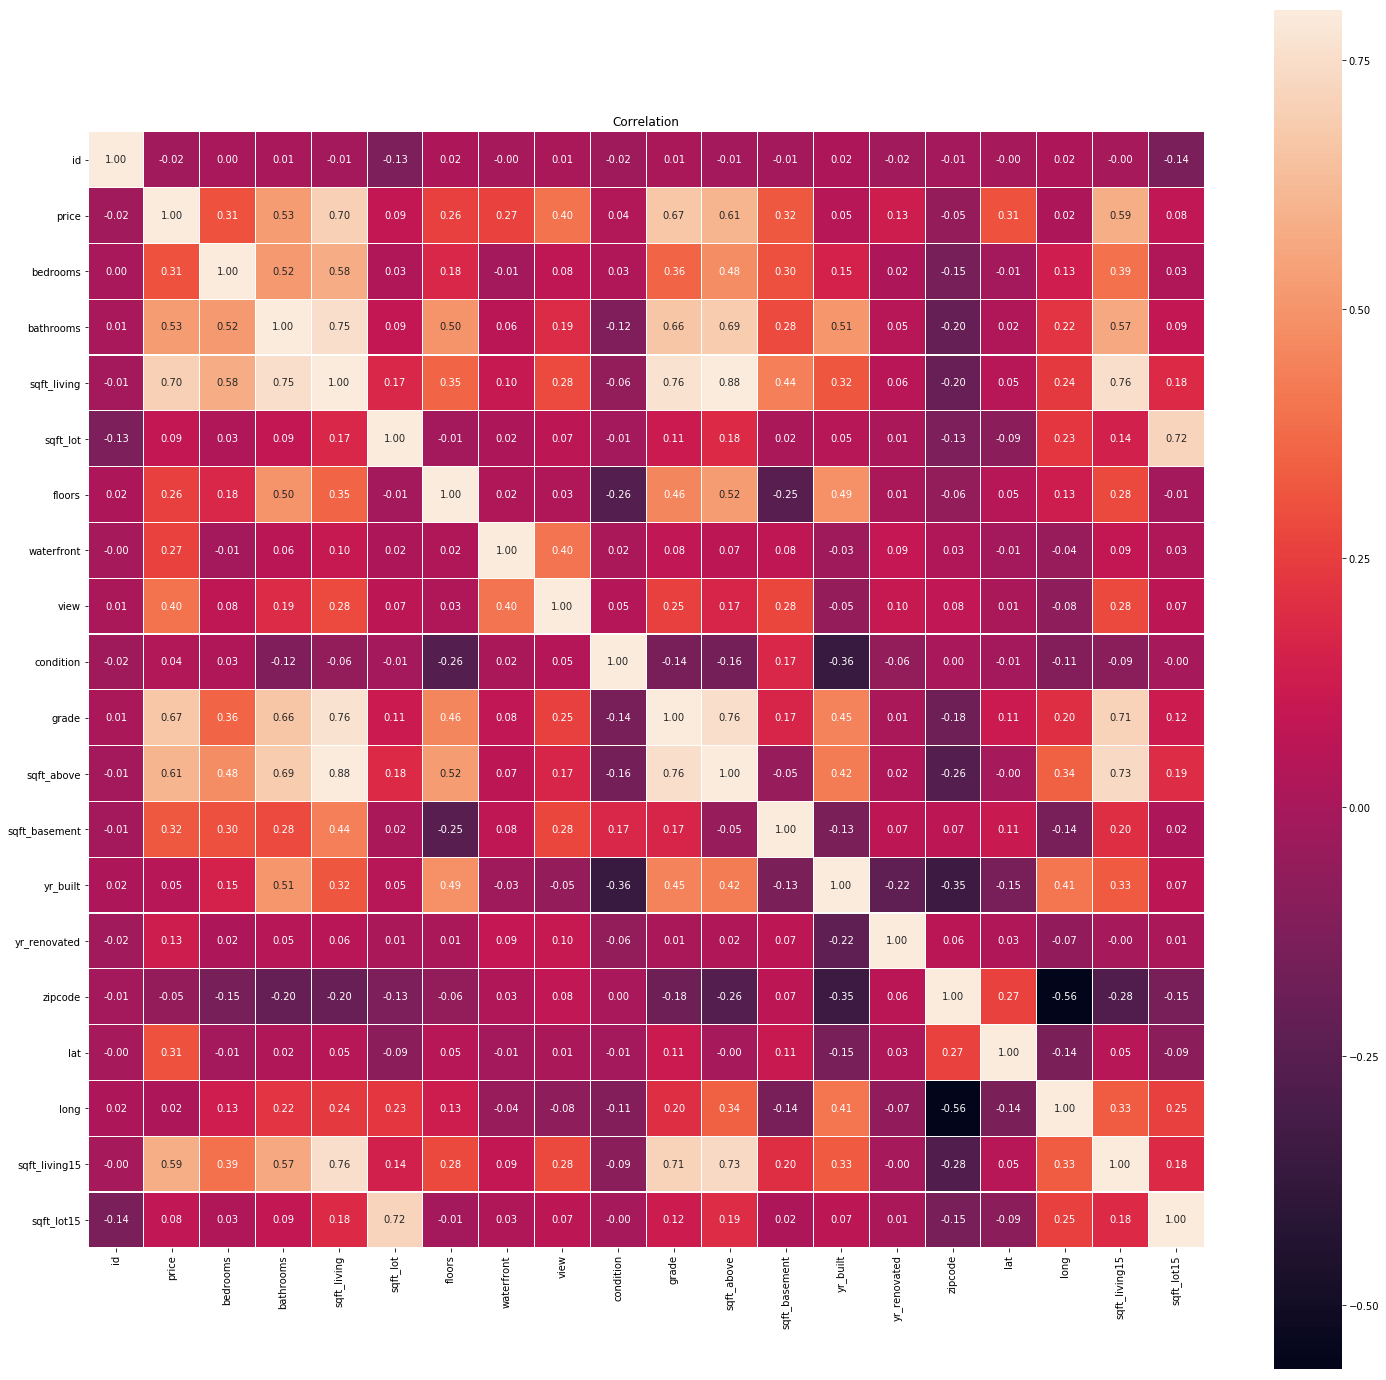

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Inference
 Finding correlation

 Correlation is a statistical measure that suggests the level of linear dependence between two variables that occur in pair. 

 Its value is between -1 to +1

 Above 0 is positive correlation i.e. X is directly proportional to Y.

 Below 0 is negative correlation i.e. X is inversly proportional to Y.

 Value close to 0 suggests weak relation.


 Picking up some of the features that are highly correlated with price

 Correlation between price and sqft_living is (0.7)

 Correlation between price and grade is (0.67)

 Correlation between price and sqft_above is (0.61)

 Correlation between price and sqft_living15 is (0.59)

 Correlation between price and bathrooms is (0.53)


 Now, let us evaluate the correlation of the below features with each others for multicolinearity.

 We would do this later by calculating VIF

 Correlation between sqft_living and sqft_above is (0.88)

 Correlation between sqft_living and sqft_living15 is (0.76)

 Correlation between sqft_living and grade is (0.76)

 Correlation between sqft living and bathrooms is (0.75)

 We would keep grade as of now as it is a category.


 Following have weak relation with price and we would remove them. date, sqft_lot, yr_built, long, sqft_lot15

 We would delete lat as well even though it has correlation of 0.31  because, 0.31 is not that significant. It is a categor.

 If we would convert it to factor, there would be way too many levels  and would make computation very expensive.

 Another reason to remove variable is to avoid overfitting.

In [24]:
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [25]:
from scipy.stats import pearsonr

correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [26]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


### Question: State your insights.

We only have the date column which is a timestamp that we can ignore, age of building already there in yr_built

We can see that the top 5 features are the most correlated features with the target "price"

Let's plot the best 2 regressors jointly

In [15]:
y = data.loc[:,['sqft_living','grade',target]].sort_values(target, ascending=True).values
x = np.arange(y.shape[0])

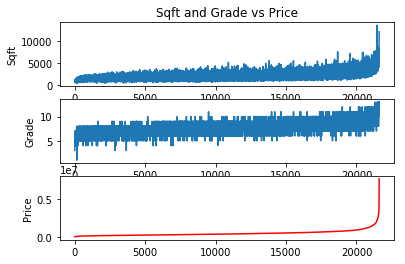

In [16]:
%matplotlib inline
plt.subplot(3,1,1)
plt.plot(x,y[:,0])
plt.title('Sqft and Grade vs Price')
plt.ylabel('Sqft')

plt.subplot(3,1,2)
plt.plot(x,y[:,1])
plt.ylabel('Grade')

plt.subplot(3,1,3)
plt.plot(x,y[:,2],'r')
plt.ylabel("Price")

plt.show()

In [18]:
# Train a simple linear regression model
regr = LinearRegression()
new_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]

In [19]:
X = new_data.values
y = data.price.values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [25]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[448638.18808713 409222.6142814  884647.19460551 ... 602830.14372384
 170138.11115301 607505.52074683]


In [26]:
regr.score(X_test,y_test)

0.7113684775587832

In [28]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 201561.44


Prediction score is about 71 which is not really optimal

### Question: Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

Here i will use k-fold cross validation to find the best predictor parameters

In [56]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [58]:
new_cv_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_cv_data.values
y = data.price.values

In [59]:
scores = []
best_lr = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_lr.fit(X_train, y_train)
    scores.append(best_lr.score(X_test, y_test))

Train Index:  [ 2162  2163  2164 ... 21610 21611 21612] 

Test Index:  [   0    1    2 ... 2159 2160 2161]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [2162 2163 2164 ... 4321 4322 4323]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [4324 4325 4326 ... 6483 6484 6485]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [6486 6487 6488 ... 8644 8645 8646]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [ 8647  8648  8649 ... 10805 10806 10807]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [10808 10809 10810 ... 12966 12967 12968]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [12969 12970 12971 ... 15127 15128 15129]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [15130 15131 15132 ... 17288 17289 17290]
Train Index:  [    0     1     2 ... 21610 21611 21612] 

Test Index:  [17291 17292 17293 ... 19449 19450 19451]
Train I

In [60]:
print(np.mean(scores))

0.686491943199935


In [61]:
cross_val_score(best_lr, X, y, cv=10)

array([0.69030782, 0.68982173, 0.6801478 , 0.68479097, 0.67206594,
       0.69260385, 0.70348821, 0.69512705, 0.69270521, 0.66386085])

In [55]:
cross_val_predict(best_lr, X, y, cv=10)

array([209912.16606325, 738802.47172965, 376200.94649043, ...,
       112983.23512617, 362205.62516011, 115914.62562809])

In [ ]:
## Use xgboost and check the accuracy(for testing purpose)

In [45]:
import xgboost
from sklearn.metrics import explained_variance_score

In [42]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)


In [43]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [46]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8839240908340753
